In [1]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import matplotlib.patches as mpatches
import numpy as np
import scipy as scp
import scipy.stats as stats
from matplotlib_venn import venn2_unweighted
from pysankey import sankey
from matplotlib import rcParams
from scipy.stats import chi2_contingency

# Load Data

In [30]:
df= pd.read_csv('../data/240_B.txt',sep="\t") 
df.head()

,PMC_ID,PMC_Year,Journal,IF,Article Title,Type of paper,Secondary analysis,Data availability statement (yes/no),Data availability with explaination(yes/no),Data availability (yes/no),...,"If yes, notebook/Rmd","If yes, single/ multiple",Summary data (yes/ no/ partial),Number of citations,Gender of the PI,"Experience of PI/ Last author (Check their profile or webpage to see whether they are an associate/ assistant/ professor/ professor emiretus, etc)",PI/ last author's training background - CS/ Bioinformatics/ Other,PI (last author's) education level - PhD/PostDoc/ Master's etc,First author's education level,First author's training background (CS/ Bioinformatics/ Other)
0,PMC6686906,2019,Nat_Genet,28.0,Accurate estimation of SNP-heritability from b...,Research article,hybrid,yes,yes for secondary/ no for primary,no,...,NaN,NaN,yes,47,Male,Associate Professor,"CS, Bioinformatics",Postdoc,MS,Bioinformatics
1,PMC7610512,2020,Nat_Genet,38.3,Regulation of single-cell genome organization ...,Research article,Hybrid,yes,yes for secondary/Available upon request for p...,no,...,NaN,NaN,yes,39,Male,Research Director,Other,Postdoc,Postdoc,"Other, Genetics"
2,PMC7343611,2020,Nat_Genet,38.3,Lymph node metastases develop through a wider ...,Research article,Hybrid,yes,yes,yes,...,notebook,multiple,yes,31,Female,Assistant Professor,Other,Phd,Postdoc,CS
3,PMC6767648,2019,Genome_Med,11.0,Identifying Crohn’s disease signal from variom...,Research article,hybrid,yes,yes for secondary/ Available upon request for ...,no,...,NaN,NaN,yes,58,Female,Associate Professor,Bioinformatics,Phd,Phd,Bioinformatics
4,PMC6862797,2019,Genome_Biol,9.5,Population-level analysis reveals the widespre...,Research article,no,yes,yes,yes,...,NaN,NaN,no,74,Male,Professor,Other,Phd,Masters,Other


In [26]:
df['Code availability (Yes/No (reason))'].unique()

array(['yes', 'no', 'no (Cannot find the code)',
       'no (available upon request)', 'no (Available upon request)',
       'no (Link expired)', 'no (Link Expired)',
       'no (No access on BitBucket)', 'no (link does Not work)',
       'no (Link not accessible)', 'no '], dtype=object)

# Data cleanup

In [31]:
#github cleanup
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'github', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'GitHub'
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'GitHub + Zenodo', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'GitHub, Zenodo'
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'Zenodo/GitHub', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'GitHub, Zenodo'

#Bitbucket cleanup
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'BitBucket', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Bitbucket'
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'Other (Bitbucket)', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Bitbucket'
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'Other (BitBucket)', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Bitbucket'

#Sourceforge cleanup 
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'Other(Sourceforge)', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Sourceforge'
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'Other (Sourceforge)', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Sourceforge'

# Website Cleanup
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'Other (Website)', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Website'
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'Others (Website)', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Website'
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'Other(Website)', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Website'
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'Other(Website), GitHub', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Website, Github'

# Supplementary Cleanup
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'Other (Supplementary)', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Supplementary'
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'Others(Supplementary)', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Supplementary'

# No,Nan merge 
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'no', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'NA'
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'nan', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'NA'

#gitlab fix 
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'gitlab', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'GitLab'

#downloadable file fix 
df.loc[df['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'downloadable file', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Downloadable File'


#GEO Fix 
df.loc[df['If Data availability = yes, where do they share data? (SRA/GEO/other)'] == 'Geo', 'If Data availability = yes, where do they share data? (SRA/GEO/other)'] = 'GEO'

#Other Fix for 'If Data availability = yes, where do they share data? (SRA/GEO/other)'
df.loc[df['If Data availability = yes, where do they share data? (SRA/GEO/other)'] == 'other', 'If Data availability = yes, where do they share data? (SRA/GEO/other)'] = 'Other'
df.loc[df['If Data availability = yes, where do they share data? (SRA/GEO/other)'] == 'SRA,other', 'If Data availability = yes, where do they share data? (SRA/GEO/other)'] = 'SRA,Other'

#cleanup secondary analysis column 
df.loc[df['Secondary analysis'] == 'hybrid', 'Secondary analysis'] = 'Hybrid'


In [18]:
df_modified = df.copy()
#df_modified.loc[df_modified['Data availability (yes/no)'] == 'upon request', 'Data availability (yes/no)'] = 'no'
df_modified.loc[df_modified['Secondary analysis'] == 'Hybrid', 'Secondary analysis'] = 'no'

df_temp=pd.DataFrame({'Counts': df_modified.groupby(['Secondary analysis']).size()}).reset_index()
df_temp

,Secondary analysis,Counts
0,no,204
1,yes,249


# Figure 1 

## Figure 1a

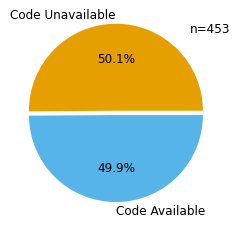

In [4]:
rcParams['font.family'] = 'sans-serif'
#colors=sns.color_palette('pastel')
colors = ['#E69F00', '#56B4E9']
explode = (0.05, 0) 
textprops = {"fontsize":12}
plt.pie(df['Code availability (Yes/No)'].value_counts(), explode=explode, labels=['Code Unavailable','Code Available'], colors=colors, autopct='%1.1f%%',textprops = textprops)
plt.text(0.85, 0.95, "n=453", fontsize=12)
sns.despine()
plt.show()


## Figure 1b

In [32]:
df_code_avail=pd.DataFrame({'Counts': df['Code availability (Yes/No)'].value_counts()}).reset_index()
#rename columns
df_code_avail=df_code_avail.rename(columns={"index":"Code availability (Yes/No)"})

#add percentage column 
df_code_avail['Percentage'] = (df_code_avail['Counts']/df_code_avail['Counts'].sum()) * 100
df_code_avail['Percentage']=df_code_avail['Percentage'].round(2)
df_code_avail

,Code availability (Yes/No),Counts,Percentage
0,no,227,50.11
1,yes,226,49.89


In [33]:
df_code_avail_statement=pd.DataFrame({'Counts': df['Code availability statement (Yes/No)'].value_counts()}).reset_index()
df_code_avail_statement=df_code_avail_statement.rename(columns={"index":"Code availability (Yes/No)"})

#add percentage column 
df_code_avail_statement['Percentage'] = (df_code_avail_statement['Counts']/df_code_avail_statement['Counts'].sum()) * 100
df_code_avail_statement['Percentage']=df_code_avail_statement['Percentage'].round(2)
df_code_avail_statement

,Code availability (Yes/No),Counts,Percentage
0,no,244,53.86
1,yes,209,46.14


In [34]:
#create dataframe for counts data of data availability and code availability 
df_temp=pd.DataFrame({'Counts': df.groupby(['Code availability statement (Yes/No)','Code availability (Yes/No)',]).size()}).reset_index()
df_temp.loc[df_temp['Code availability statement (Yes/No)'] == 'yes', 'Code availability statement (Yes/No)'] = 'Code Availability\nStatement Given\n(' + str(df_code_avail_statement['Percentage'][1]) + '%)'
df_temp.loc[df_temp['Code availability statement (Yes/No)'] == 'no', 'Code availability statement (Yes/No)'] = 'Code Availability\nStatement Not Given\n(' + str(df_code_avail_statement['Percentage'][0]) +'%)'
df_temp.loc[df_temp['Code availability (Yes/No)'] == 'no', 'Code availability (Yes/No)'] = 'Code Unavailable\n(' + str(df_code_avail['Percentage'][0]) + '%)'
df_temp.loc[df_temp['Code availability (Yes/No)'] == 'yes', 'Code availability (Yes/No)'] = 'Code Available\n(' + str(df_code_avail['Percentage'][1]) + '%)'


df_temp

,Code availability statement (Yes/No),Code availability (Yes/No),Counts
0,Code Availability\nStatement Not Given\n(53.86%),Code Unavailable\n(50.11%),197
1,Code Availability\nStatement Not Given\n(53.86%),Code Available\n(49.89%),47
2,Code Availability\nStatement Given\n(46.14%),Code Unavailable\n(50.11%),30
3,Code Availability\nStatement Given\n(46.14%),Code Available\n(49.89%),179


<AxesSubplot:>

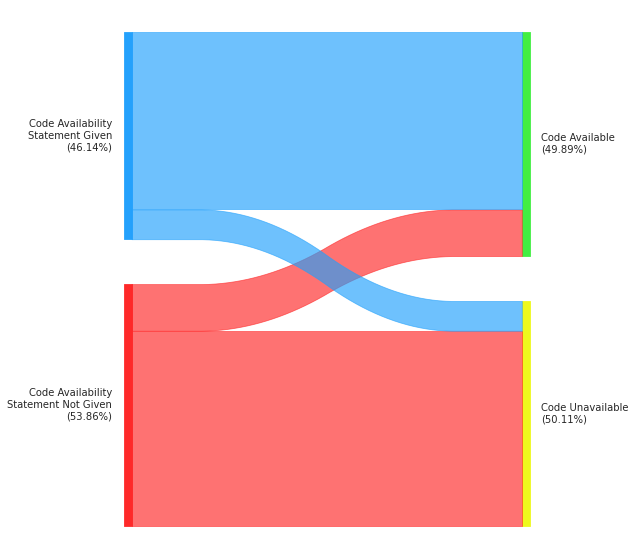

In [35]:
plt.figure(figsize=(8, 10))
rcParams['font.family'] = 'sans-serif'
category_labels = [
    'Code Availability\nStatement Not Given\n(' + str(df_code_avail_statement['Percentage'][0]) +'%)',
    'Code Availability\nStatement Given\n(' + str(df_code_avail_statement['Percentage'][1]) + '%)', 
    'Code Unavailable\n(' + str(df_code_avail['Percentage'][0]) + '%)',
    'Code Available\n(' + str(df_code_avail['Percentage'][1]) + '%)'
]
colors = ["#fe2626","#21a0fc","#eef91a","#40ee40"]

#colors = sns.color_palette("pastel")
color_dict = {}
for i, label in enumerate(category_labels):
    color_dict[label] = colors[i]

sankey(
    left=df_temp['Code availability statement (Yes/No)'].values, right=df_temp['Code availability (Yes/No)'].values,  rightWeight=df_temp['Counts'].values.astype(float), leftWeight=df_temp['Counts'].values.astype(float), aspect=20,
    fontsize=10,colorDict=color_dict
)


## Figure 1c

In [36]:
df_temp=pd.DataFrame({'Counts': df.groupby(['Secondary analysis','Code availability (Yes/No)']).size()}).reset_index()
df_temp.loc[df_temp['Secondary analysis'] == 'hybrid', 'Secondary analysis'] = 'Hybrid'
df_temp['Analysis']='Unknown'
df_temp.loc[df_temp['Secondary analysis'] == 'yes', 'Analysis'] = 'Secondary Analysis'
df_temp.loc[df_temp['Secondary analysis'] == 'Hybrid', 'Analysis'] = 'Both'
df_temp.loc[df_temp['Secondary analysis'] == 'no', 'Analysis'] = 'Primary Analysis'
#df_temp.loc[df_temp['Secondary analysis'] == 'Hybrid', 'Secondary analysis'] = 'yes'
df_temp = df_temp.drop('Secondary analysis', axis=1)


#dealing with both value for Analysis column
df_temp.loc[(df_temp['Code availability (Yes/No)'] == 'yes') & (df_temp['Analysis'] == 'Primary Analysis'),'Counts'] += int(df_temp.loc[(df_temp['Code availability (Yes/No)'] == 'yes') & (df_temp['Analysis'] == 'Both'),'Counts'])
df_temp.loc[(df_temp['Code availability (Yes/No)'] == 'yes') & (df_temp['Analysis'] == 'Secondary Analysis'),'Counts'] += int(df_temp.loc[(df_temp['Code availability (Yes/No)'] == 'yes') & (df_temp['Analysis'] == 'Both'),'Counts'])
df_temp = df_temp.drop(df_temp.loc[df_temp['Analysis']=='Both'].index[0])


#df_temp['Percentage'] = (df_temp['Counts']/df_temp['Counts'].sum()) * 100
#df_temp['Percentage']=df_temp['Percentage'].round(2)

df_temp=df_temp.pivot(index='Analysis',columns='Code availability (Yes/No)',values='Counts')
df_temp=df_temp.rename(columns={"no":"Code Unavailable","yes":"Code Available"})
df_temp

Code availability (Yes/No),Code Unavailable,Code Available
Analysis,,
Primary Analysis,130,74
Secondary Analysis,97,156


In [37]:
# Perform chi-squared test
chi2, p, dof, expected = chi2_contingency(df_temp)

# Display the test results
print("Chi-squared statistic:", chi2)
print("P-value:", p)

Chi-squared statistic: 28.106391604188723
P-value: 1.1482601063804904e-07


<Figure size 720x720 with 0 Axes>

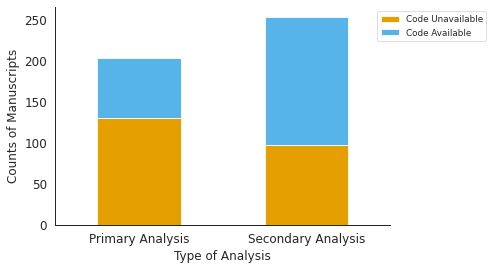

In [38]:
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 12})
rcParams['font.family'] = 'sans-serif'
sns.set_context("paper",font_scale=1)
colors = ['#0072B2','#D55E00']
df_temp.plot(kind='bar', stacked=True, color=['#E69F00', '#56B4E9'])
plt.legend(['Code Unavailable', 'Code Available'],loc='upper right', bbox_to_anchor=(1.3, 1))
plt.xlabel("Type of Analysis",fontsize=12)
plt.ylabel("Counts of Manuscripts",fontsize=12)
#plt.ylim(0,100)
plt.xticks(rotation=0)
plt.tick_params(axis='both', labelsize=12)
sns.despine()
#plt.savefig('../Figures/sup2_v2.png', format='png', dpi=300,bbox_inches='tight')
plt.show()

## Figure 1d

In [49]:

#replace upon request with no in the Data availability column of the data
df_modified = df.copy()
df_modified.loc[df_modified['Data availability (yes/no)'] == 'upon request', 'Data availability (yes/no)'] = 'no'
df_modified.loc[df_modified['Secondary analysis'] == 'Hybrid', 'Secondary analysis'] = 'no'
#create dataframe for counts data of data availability and code availability, pmc_year, and analysis type 
df_temp=pd.DataFrame({'Counts': df_modified.groupby(['Data availability (yes/no)','Code availability (Yes/No)','PMC_Year','Secondary analysis']).size()}).reset_index()

#filter df_temp to only have rows where data and code are available, only data shared, and only code shared 
df_temp=df_temp[~((df_temp['Data availability (yes/no)']=='no') & (df_temp['Code availability (Yes/No)']=='no'))]
#filter df_temp to only have primary studies 
df_temp=df_temp[~(df_temp['Secondary analysis']=='yes')]
#create percentage column
df_temp['Percent Increase'] = (df_temp['Counts']/204) * 100
#df_temp['Cumulative Percent Increase']=df_temp['Percent Increase'].cumsum()
#df_temp['Percentage']=df_temp['Percentage'].round(2)
#df_temp['Cumulative Percent Increase']=df_temp['Cumulative Percent Increase'].round(2)
#Create labels column
df_temp['Labels']='Unknown'
df_temp.loc[(df_temp['Data availability (yes/no)'] == 'yes') & (df_temp['Code availability (Yes/No)']=='yes'), 'Labels'] = 'Data and Code Both Shared'
df_temp.loc[(df_temp['Data availability (yes/no)'] == 'yes') & (df_temp['Code availability (Yes/No)']=='no'), 'Labels'] = 'Only Data Shared'
df_temp.loc[(df_temp['Data availability (yes/no)'] == 'no') & (df_temp['Code availability (Yes/No)']=='yes'), 'Labels'] = 'Only Code Shared'

df_temp


,Data availability (yes/no),Code availability (Yes/No),PMC_Year,Secondary analysis,Counts,Percent Increase,Labels
6,no,yes,2016,no,1,0.490196,Only Code Shared
7,no,yes,2017,no,1,0.490196,Only Code Shared
8,no,yes,2018,no,2,0.980392,Only Code Shared
9,no,yes,2019,no,3,1.470588,Only Code Shared
10,no,yes,2020,no,6,2.941176,Only Code Shared
11,yes,no,2016,no,11,5.392157,Only Data Shared
12,yes,no,2017,no,19,9.313725,Only Data Shared
13,yes,no,2018,no,17,8.333333,Only Data Shared
14,yes,no,2019,no,12,5.882353,Only Data Shared
15,yes,no,2020,no,8,3.921569,Only Data Shared


### V2

In [50]:
df_stacked = df_temp[['Labels', 'Percent Increase', 'PMC_Year']]
df_stacked=df_stacked.pivot(index='PMC_Year',columns='Labels', values='Percent Increase')
df_stacked=df_stacked.fillna(0)
df_stacked['Data and Code Both Shared']=df_stacked['Data and Code Both Shared'].cumsum()
df_stacked['Data and Code Both Shared']=df_stacked['Data and Code Both Shared'].round(2)
df_stacked['Only Code Shared']=df_stacked['Only Code Shared'].cumsum()
df_stacked['Only Code Shared']=df_stacked['Only Code Shared'].round(2)
df_stacked['Only Data Shared']=df_stacked['Only Data Shared'].cumsum()
df_stacked['Only Data Shared']=df_stacked['Only Data Shared'].round(2)
df_stacked

Labels,Data and Code Both Shared,Only Code Shared,Only Data Shared
PMC_Year,,,
2016,3.92,0.49,5.39
2017,7.35,0.98,14.71
2018,9.31,1.96,23.04
2019,15.69,3.43,28.92
2020,22.06,6.37,32.84
2021,29.90,6.37,39.71


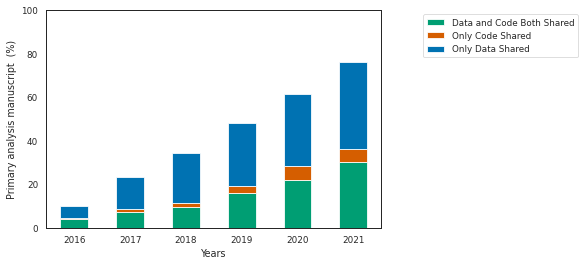

In [51]:
sns.set_style("white")
sns.set_context("paper",font_scale=1)
# create stacked bar chart for monthly temperatures
df_stacked.plot(kind='bar', stacked=True,color=['#009E73','#D55E00','#0072B2'], rot=0)
plt.ylim([0, 100])
# labels for x & y axis
plt.xlabel("Years")
plt.ylabel("Primary analysis manuscript  (%)")
plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1))
plt.show()

## Figure 1e

In [39]:
#create dataframe for counts data of code availability 
df_modified = df.copy()
#df_modified.loc[df_modified['Data availability (yes/no)'] == 'upon request', 'Data availability (yes/no)'] = 'no'
df_modified.loc[df_modified['Secondary analysis'] == 'Hybrid', 'Secondary analysis'] = 'no'
df_temp=pd.DataFrame({'Counts': df_modified.groupby(['Code availability (Yes/No)','PMC_Year','Secondary analysis']).size()}).reset_index()

#filter df_temp to only have rows where data and code are available, only data shared, and only code shared 
df_temp=df_temp[~((df_temp['Code availability (Yes/No)']=='no'))]
#filter df_temp to only have primary studies 
df_temp=df_temp[~(df_temp['Secondary analysis']=='yes')]
#create percentage column
df_temp['Percent Increase'] = (df_temp['Counts']/453) * 100
df_temp['Cumulative Percent Increase']=df_temp['Percent Increase'].cumsum()
df_temp['Cumulative Percent Increase']=df_temp['Cumulative Percent Increase'].round(2)
df_temp=df_temp.reset_index()
df_temp=df_temp.drop('index', axis=1)
df_temp

,Code availability (Yes/No),PMC_Year,Secondary analysis,Counts,Percent Increase,Cumulative Percent Increase
0,yes,2016,no,9,1.986755,1.99
1,yes,2017,no,8,1.766004,3.75
2,yes,2018,no,6,1.324503,5.08
3,yes,2019,no,16,3.532009,8.61
4,yes,2020,no,19,4.194260,12.80
5,yes,2021,no,16,3.532009,16.34


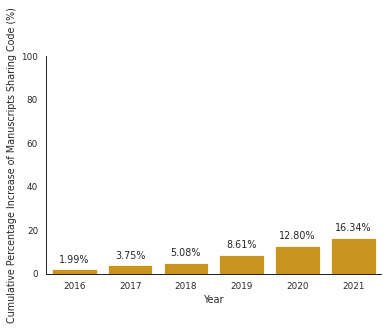

In [40]:
sns.set_style("white")
sns.set_context("paper",font_scale=1)
colors = ['#E69F00']
sns.barplot(data=df_temp, x='PMC_Year', y='Cumulative Percent Increase', palette=colors)

for index, row in df_temp.iterrows():
    plt.annotate(f'{row["Cumulative Percent Increase"]:.2f}%', xy=(index, row['Cumulative Percent Increase']),
                 xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
sns.despine()
plt.xlabel("Year")
plt.ylabel("Cumulative Percentage Increase of Manuscripts Sharing Code (%)")
plt.ylim([0, 100])
plt.show()

## Figure 1f

In [41]:
#replace upon request with no in the Data availability column of the data
df_modified = df.copy()
df_modified.loc[df_modified['Data availability (yes/no)'] == 'upon request', 'Data availability (yes/no)'] = 'no'
#create dataframe for counts data of data availability and code availability 
df_temp=pd.DataFrame({'Counts': df_modified.groupby(['Data availability (yes/no)','Code availability (Yes/No)']).size()}).reset_index()
df_temp['Labels']=['Neither Available','Only Code','Only Data','Code and Data Available']
df_temp

,Data availability (yes/no),Code availability (Yes/No),Counts,Labels
0,no,no,49,Neither Available
1,no,yes,13,Only Code
2,yes,no,81,Only Data
3,yes,yes,61,Code and Data Available


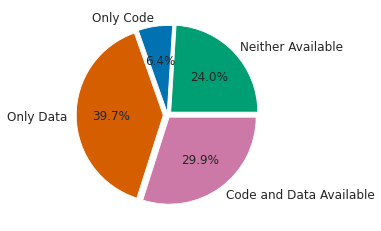

In [42]:
rcParams['font.family'] = 'sans-serif'
colors = ['#009E73', '#0072B2','#D55E00', '#CC79A7']
explode = (0.05,0.03,0.05,0.03)
textprops = {"fontsize":12}
plt.pie(df_temp['Counts'], explode=explode, labels=df_temp['Labels'], colors=colors, autopct='%1.1f%%',textprops = textprops)
sns.despine()
plt.show()


# Multipanel

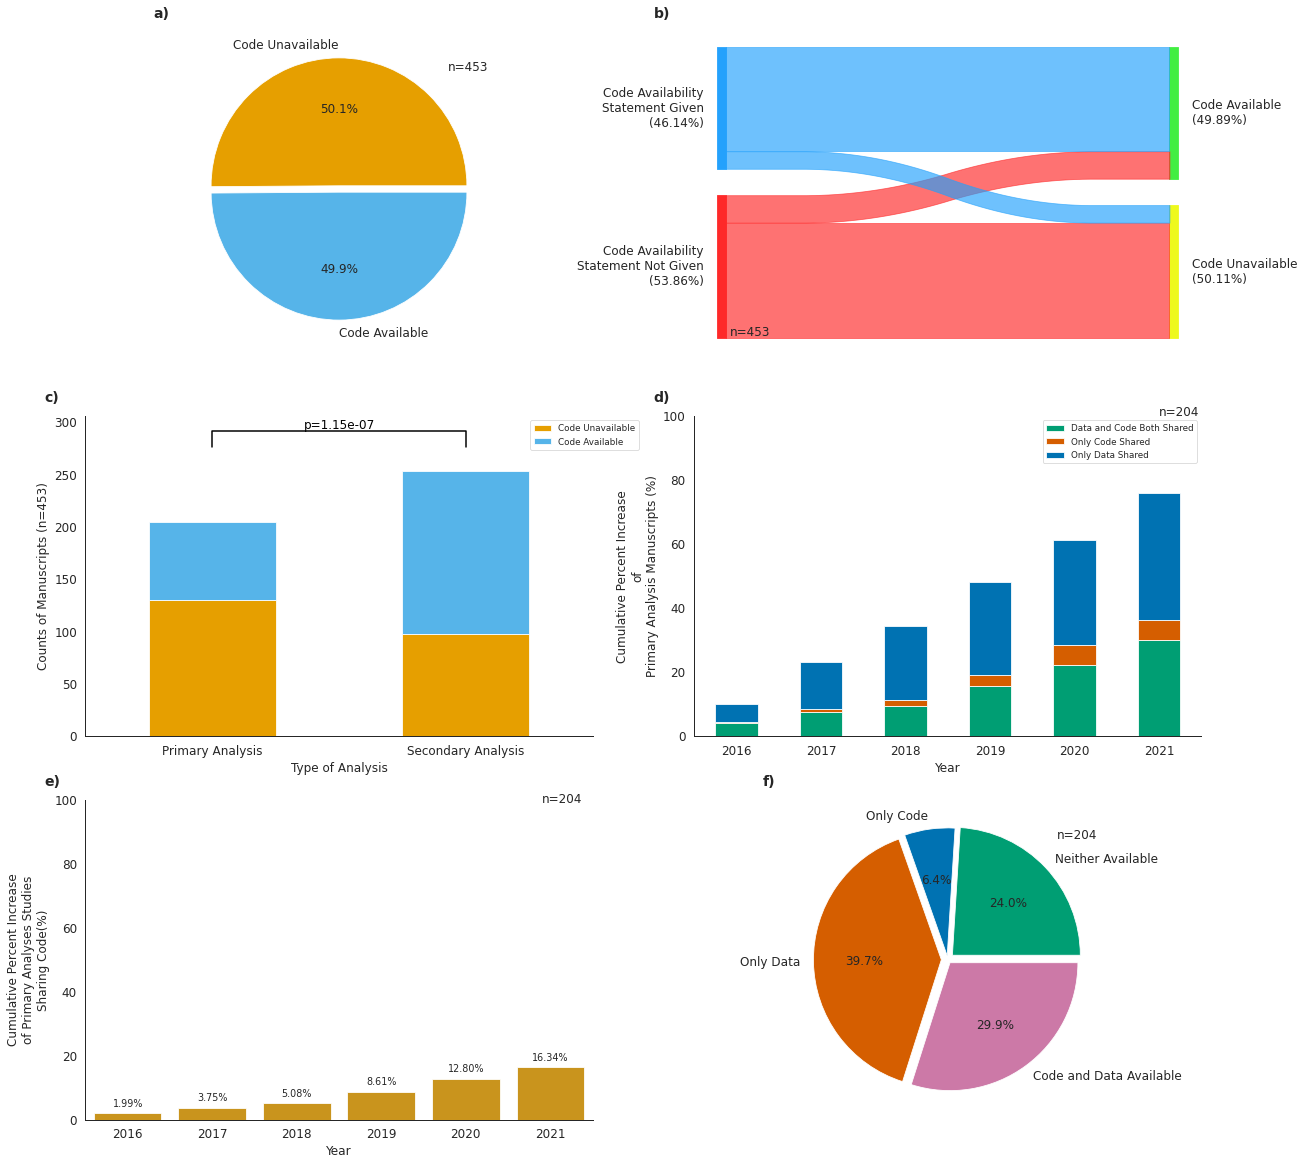

In [48]:

sns.set_style("white")
sns.set_context("paper",font_scale=1)
#sns.color_palette("pastel")
rcParams['font.family'] = 'sans-serif'
#sns.set(font_scale=1)
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(3, 2,figsize=(20 ,20))

#fig 1a 
textprops = {"fontsize":12}
explode = (0.05, 0) 
colors = ['#E69F00', '#56B4E9']
ax[0,0].pie(df['Code availability (Yes/No)'].value_counts(), explode=explode, labels=['Code Unavailable','Code Available'], colors=colors, autopct='%1.1f%%',textprops = textprops)
ax[0,0].text(0.85, 0.95, "n=" + str(df['Code availability (Yes/No)'].value_counts().sum()), fontsize=12)

# fig 1b
df_code_avail=pd.DataFrame({'Counts': df['Code availability (Yes/No)'].value_counts()}).reset_index()
#rename columns
df_code_avail=df_code_avail.rename(columns={"index":"Code availability (Yes/No)"})

#add percentage column 
df_code_avail['Percentage'] = (df_code_avail['Counts']/df_code_avail['Counts'].sum()) * 100
df_code_avail['Percentage']=df_code_avail['Percentage'].round(2)

df_code_avail_statement=pd.DataFrame({'Counts': df['Code availability statement (Yes/No)'].value_counts()}).reset_index()
df_code_avail_statement=df_code_avail_statement.rename(columns={"index":"Code availability (Yes/No)"})

#add percentage column 
df_code_avail_statement['Percentage'] = (df_code_avail_statement['Counts']/df_code_avail_statement['Counts'].sum()) * 100
df_code_avail_statement['Percentage']=df_code_avail_statement['Percentage'].round(2)

#create dataframe for counts data of data availability and code availability 
df_temp=pd.DataFrame({'Counts': df.groupby(['Code availability statement (Yes/No)','Code availability (Yes/No)',]).size()}).reset_index()
df_temp.loc[df_temp['Code availability statement (Yes/No)'] == 'yes', 'Code availability statement (Yes/No)'] = 'Code Availability\nStatement Given\n(' + str(df_code_avail_statement['Percentage'][1]) + '%)'
df_temp.loc[df_temp['Code availability statement (Yes/No)'] == 'no', 'Code availability statement (Yes/No)'] = 'Code Availability\nStatement Not Given\n(' + str(df_code_avail_statement['Percentage'][0]) +'%)'
df_temp.loc[df_temp['Code availability (Yes/No)'] == 'no', 'Code availability (Yes/No)'] = 'Code Unavailable\n(' + str(df_code_avail['Percentage'][0]) + '%)'
df_temp.loc[df_temp['Code availability (Yes/No)'] == 'yes', 'Code availability (Yes/No)'] = 'Code Available\n(' + str(df_code_avail['Percentage'][1]) + '%)'

category_labels = [
    'Code Availability\nStatement Not Given\n(' + str(df_code_avail_statement['Percentage'][0]) +'%)',
    'Code Availability\nStatement Given\n(' + str(df_code_avail_statement['Percentage'][1]) + '%)', 
    'Code Unavailable\n(' + str(df_code_avail['Percentage'][0]) + '%)',
    'Code Available\n(' + str(df_code_avail['Percentage'][1]) + '%)'
]

colors = ["#fe2626","#21a0fc","#eef91a","#40ee40"]
color_dict = {}
for i, label in enumerate(category_labels):
    color_dict[label] = colors[i]
sankey(
    left=df_temp['Code availability statement (Yes/No)'], right=df_temp['Code availability (Yes/No)'],  aspect=20, rightWeight=df_temp['Counts'].values.astype(float), leftWeight=df_temp['Counts'].values.astype(float),
    fontsize=12,colorDict=color_dict, ax=ax[0,1]
)
ax[0,1].text(0.23, 4, "n=" + str(df_temp['Counts'].sum()), fontsize=12)
ax[0,1].tick_params(axis='both', labelsize=12)



#fig 1c 
df_temp=pd.DataFrame({'Counts': df.groupby(['Secondary analysis','Code availability (Yes/No)']).size()}).reset_index()
df_temp.loc[df_temp['Secondary analysis'] == 'hybrid', 'Secondary analysis'] = 'Hybrid'
df_temp['Analysis']='Unknown'
df_temp.loc[df_temp['Secondary analysis'] == 'yes', 'Analysis'] = 'Secondary Analysis'
df_temp.loc[df_temp['Secondary analysis'] == 'Hybrid', 'Analysis'] = 'Both'
df_temp.loc[df_temp['Secondary analysis'] == 'no', 'Analysis'] = 'Primary Analysis'
df_temp = df_temp.drop('Secondary analysis', axis=1)
#dealing with both value for Analysis column
df_temp.loc[(df_temp['Code availability (Yes/No)'] == 'yes') & (df_temp['Analysis'] == 'Primary Analysis'),'Counts'] += int(df_temp.loc[(df_temp['Code availability (Yes/No)'] == 'yes') & (df_temp['Analysis'] == 'Both'),'Counts'])
df_temp.loc[(df_temp['Code availability (Yes/No)'] == 'yes') & (df_temp['Analysis'] == 'Secondary Analysis'),'Counts'] += int(df_temp.loc[(df_temp['Code availability (Yes/No)'] == 'yes') & (df_temp['Analysis'] == 'Both'),'Counts'])
df_temp = df_temp.drop(df_temp.loc[df_temp['Analysis']=='Both'].index[0])
y, h, col = df_temp['Counts'].max() + 120, 15, 'k'
df_temp=df_temp.pivot(index='Analysis',columns='Code availability (Yes/No)',values='Counts')
df_temp=df_temp.rename(columns={"no":"Code Unavailable","yes":"Code Available"})
chi2, p, dof, expected = chi2_contingency(df_temp)
colors = ['#0072B2','#D55E00']
df_temp.plot(kind='bar', stacked=True, color=['#E69F00', '#56B4E9'], ax=ax[1,0], rot=0)
ax[1,0].legend(['Code Unavailable', 'Code Available'],loc='upper right', bbox_to_anchor=(1.1, 1))
ax[1,0].set_xlabel("Type of Analysis",fontsize=12)
ax[1,0].set_ylabel("Counts of Manuscripts (n=453)",fontsize=12)
ax[1,0].tick_params(axis='both', labelsize=12)

# statistical annotation
x1, x2 = 0, 1   # columns 'Sat' and 'Sun' (first column: 0, see plt.xticks())
ax[1,0].plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax[1,0].text((x1+x2)*.5, y+h, "p="+ str(p.round(9)), ha='center', va='bottom', color=col, fontsize=12)

#fig 1d 
#replace upon request with no in the Data availability column of the data
df_modified = df.copy()
df_modified.loc[df_modified['Data availability (yes/no)'] == 'upon request', 'Data availability (yes/no)'] = 'no'
df_modified.loc[df_modified['Secondary analysis'] == 'Hybrid', 'Secondary analysis'] = 'no'
#create dataframe for counts data of data availability and code availability, pmc_year, and analysis type 
df_temp=pd.DataFrame({'Counts': df_modified.groupby(['Data availability (yes/no)','Code availability (Yes/No)','PMC_Year','Secondary analysis']).size()}).reset_index()

#filter df_temp to only have rows where data and code are available, only data shared, and only code shared 
df_temp=df_temp[~((df_temp['Data availability (yes/no)']=='no') & (df_temp['Code availability (Yes/No)']=='no'))]
#filter df_temp to only have primary studies 
df_temp=df_temp[~(df_temp['Secondary analysis']=='yes')]
#create percentage column
df_temp['Percent Increase'] = (df_temp['Counts']/204) * 100
#df_temp['Cumulative Percent Increase']=df_temp['Percent Increase'].cumsum()
#df_temp['Percentage']=df_temp['Percentage'].round(2)
#df_temp['Cumulative Percent Increase']=df_temp['Cumulative Percent Increase'].round(2)
#Create labels column
df_temp['Labels']='Unknown'
df_temp.loc[(df_temp['Data availability (yes/no)'] == 'yes') & (df_temp['Code availability (Yes/No)']=='yes'), 'Labels'] = 'Data and Code Both Shared'
df_temp.loc[(df_temp['Data availability (yes/no)'] == 'yes') & (df_temp['Code availability (Yes/No)']=='no'), 'Labels'] = 'Only Data Shared'
df_temp.loc[(df_temp['Data availability (yes/no)'] == 'no') & (df_temp['Code availability (Yes/No)']=='yes'), 'Labels'] = 'Only Code Shared'
df_stacked = df_temp[['Labels', 'Percent Increase', 'PMC_Year']]
df_stacked=df_stacked.pivot(index='PMC_Year',columns='Labels', values='Percent Increase')
df_stacked=df_stacked.fillna(0)
df_stacked['Data and Code Both Shared']=df_stacked['Data and Code Both Shared'].cumsum()
df_stacked['Data and Code Both Shared']=df_stacked['Data and Code Both Shared'].round(2)
df_stacked['Only Code Shared']=df_stacked['Only Code Shared'].cumsum()
df_stacked['Only Code Shared']=df_stacked['Only Code Shared'].round(2)
df_stacked['Only Data Shared']=df_stacked['Only Data Shared'].cumsum()
df_stacked['Only Data Shared']=df_stacked['Only Data Shared'].round(2)
sns.set_style("white")
sns.set_context("paper",font_scale=1)
# create stacked bar chart for monthly temperatures
df_stacked.plot(kind='bar', stacked=True,color=['#009E73','#D55E00','#0072B2'], rot=0, ax=ax[1,1])
sns.despine()
ax[1,1].legend(loc='upper right', bbox_to_anchor=(1, 1))
ax[1,1].set_xlabel("Year", fontsize=12)
ax[1,1].set_ylabel("Cumulative Percent Increase\nof\nPrimary Analysis Manuscripts (%)",fontsize=12)
ax[1,1].set_ylim(0,100)
ax[1,1].text(5, 100, "n=204", fontsize=12)
ax[1,1].tick_params(axis='both', labelsize=12)


#Fig 1e
#create dataframe for counts data of code availability 
df_modified = df.copy()
#df_modified.loc[df_modified['Data availability (yes/no)'] == 'upon request', 'Data availability (yes/no)'] = 'no'
df_modified.loc[df_modified['Secondary analysis'] == 'Hybrid', 'Secondary analysis'] = 'no'
df_temp=pd.DataFrame({'Counts': df_modified.groupby(['Code availability (Yes/No)','PMC_Year','Secondary analysis']).size()}).reset_index()

#filter df_temp to only have rows where data and code are available, only data shared, and only code shared 
df_temp=df_temp[~((df_temp['Code availability (Yes/No)']=='no'))]
#filter df_temp to only have primary studies 
df_temp=df_temp[~(df_temp['Secondary analysis']=='yes')]
#create percentage column
df_temp['Percent Increase'] = (df_temp['Counts']/453) * 100
df_temp['Cumulative Percent Increase']=df_temp['Percent Increase'].cumsum()
df_temp['Cumulative Percent Increase']=df_temp['Cumulative Percent Increase'].round(2)
df_temp=df_temp.reset_index()
df_temp=df_temp.drop('index', axis=1)
colors = ['#E69F00']
sns.barplot(ax=ax[2,0],data=df_temp, x='PMC_Year', y='Cumulative Percent Increase',palette=colors)

for index, row in df_temp.iterrows():
    ax[2,0].annotate(f'{row["Cumulative Percent Increase"]:.2f}%', xy=(index, row['Cumulative Percent Increase']),
                 xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
plt.ylim([0, 100])
ax[2,0].text(4.9, 99, "n=204", fontsize=12)
ax[2,0].tick_params(axis='both', labelsize=12)
ax[2,0].set_xlabel('Year', fontsize=12)
ax[2,0].set_ylabel('Cumulative Percent Increase\nof Primary Analyses Studies\nSharing Code(%)', fontsize=12)
ax[2,0].set_ylim(0,100)


# Add labels to each subplot
labels = ['a)', 'b)', 'c)', 'd)', 'e)','f)']

for i, axes in enumerate(ax.flatten()):
    axes.text(-0.08, 1.08, labels[i], transform=axes.transAxes, fontsize=14, fontweight='bold', va='top')


#Fig 1f
#replace upon request with no in the Data availability column of the data
df_modified = df.copy()
df_modified.loc[df_modified['Data availability (yes/no)'] == 'upon request', 'Data availability (yes/no)'] = 'no'
#create dataframe for counts data of data availability and code availability 
df_temp=pd.DataFrame({'Counts': df_modified.groupby(['Data availability (yes/no)','Code availability (Yes/No)']).size()}).reset_index()
df_temp['Labels']=['Neither Available','Only Code','Only Data','Code and Data Available']
explode = (0.05,0.03,0.05,0.03)
textprops = {"fontsize":12}
colors = ['#009E73', '#0072B2','#D55E00', '#CC79A7']
ax[2,1].pie(df_temp['Counts'], explode=explode, labels=df_temp['Labels'], colors=colors, autopct='%1.1f%%',textprops = textprops)
ax[2,1].text(0.85, 0.95, "n=" + str(df_temp['Counts'].sum()), fontsize=12)




#sns.despine()
plt.show()
fig.savefig('../Figures/fig1.png', format='png', dpi=300)

# Supp Figs

## Supplementary Figure 1

In [9]:
#create dataframe of counts
#df_temp=pd.DataFrame({'Counts': df['If Data availability = yes, where do they share data? (SRA/GEO/other)','Secondary analysis'].value_counts()}).reset_index()
df_temp=pd.DataFrame({'Counts': df.groupby(['Secondary analysis','If Data availability = yes, where do they share data? (SRA/GEO/other)']).size()}).reset_index()
#ensure data only contains primary analysis studies 
df_temp=df_temp[~(df_temp['Secondary analysis']=='yes')]

#merge hybrid row into the Other category for no 
df_temp.loc[3,'Counts'] += df_temp.loc[0,'Counts']
df_temp = df_temp.drop(0)

#adding SRA,GSE to SRA and GSE Counts
df_temp.loc[4,'Counts'] += df_temp.loc[5,'Counts']
df_temp.loc[2,'Counts'] += df_temp.loc[5,'Counts']
df_temp = df_temp.drop(5)


#adding SRA,GEO to SRA and GEO Counts
df_temp.loc[4,'Counts'] += df_temp.loc[6,'Counts']
df_temp.loc[1,'Counts'] += df_temp.loc[6,'Counts']
df_temp = df_temp.drop(6)

#adding SRA,Other to SRA and Other Counts 
df_temp.loc[4,'Counts'] += df_temp.loc[7,'Counts']
df_temp.loc[3,'Counts'] += df_temp.loc[7,'Counts']
df_temp = df_temp.drop(7)

#rename columns
df_temp=df_temp.rename(columns={"If Data availability = yes, where do they share data? (SRA/GEO/other)":"Data Repository"})

#add percentage column 
df_temp['Percentage'] = (df_temp['Counts']/df_temp['Counts'].sum()) * 100
df_temp['Percentage']=df_temp['Percentage'].round(2)

#sort by percentage 
df_temp=df_temp.sort_values('Percentage', ascending=False)
#drop secondary analysis column 
df_temp=df_temp.drop('Secondary analysis', axis=1)

df_temp=df_temp.reset_index()
df_temp=df_temp.drop('index', axis=1)
df_temp

,Data Repository,Counts,Percentage
0,Other,69,47.26
1,GEO,42,28.77
2,SRA,26,17.81
3,GSE,9,6.16


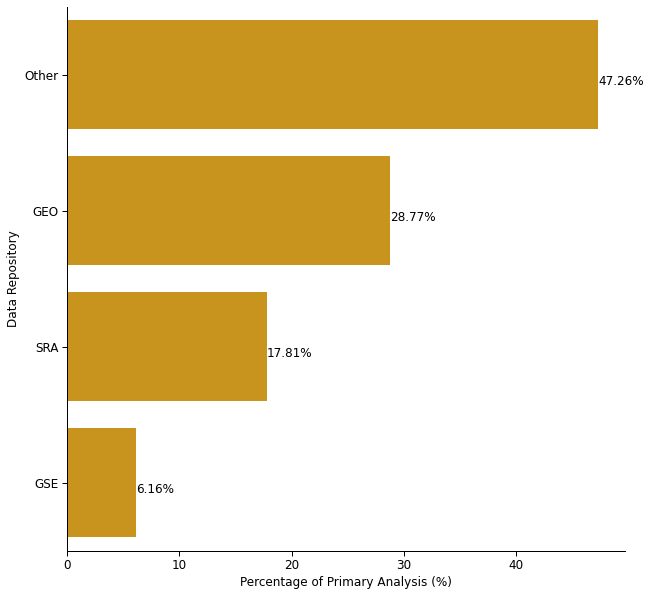

In [10]:
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 12})
rcParams['font.family'] = 'sans-serif'
sns.set_context("paper",font_scale=1)
colors = ["#E69F00"]
sns.barplot(data=df_temp, x='Percentage',y='Data Repository',palette=colors)
for index, row in df_temp.iterrows():
    plt.annotate(f'{row["Percentage"]}%', xy=(row['Percentage'],index),ha='left', va='top', fontsize=12)
plt.xlabel("Percentage of Primary Analysis (%)", fontsize=12)
plt.ylabel("Data Repository", fontsize=12)
plt.tick_params(axis='both', labelsize=12)
sns.despine()
plt.savefig('../Figures/sup1.png', format='png', dpi=300)
plt.show()

## Supplementary Figure 2

In [8]:
df_data_avail=pd.DataFrame({'Counts': df['Data availability (yes/no)'].value_counts()}).reset_index()
#rename columns
df_data_avail=df_data_avail.rename(columns={"index":"Data availability (yes/no)"})

#add percentage column 
df_data_avail['Percentage'] = (df_data_avail['Counts']/df_data_avail['Counts'].sum()) * 100
df_data_avail['Percentage']=df_data_avail['Percentage'].round(2)
df_data_avail

,Data availability (yes/no),Counts,Percentage
0,yes,142,69.61
1,no,41,20.10
2,upon request,21,10.29


In [9]:
df_data_avail_statement=pd.DataFrame({'Counts': df['Data availability statement (yes/no)'].value_counts()}).reset_index()
df_data_avail_statement=df_data_avail_statement.rename(columns={"index":"Data availability statement (yes/no)"})

#add percentage column 
df_data_avail_statement['Percentage'] = (df_data_avail_statement['Counts']/df_data_avail_statement['Counts'].sum()) * 100
df_data_avail_statement['Percentage']=df_data_avail_statement['Percentage'].round(2)
df_data_avail_statement

,Data availability statement (yes/no),Counts,Percentage
0,yes,302,67.71
1,no,144,32.29


In [10]:
df_temp=pd.DataFrame({'Counts': df.groupby(['Data availability statement (yes/no)','Data availability (yes/no)']).size()}).reset_index()
df_temp.loc[df_temp['Data availability statement (yes/no)'] == 'yes', 'Data availability statement (yes/no)'] = 'Data Availability\nStatement Given\n(' + str(df_data_avail_statement['Percentage'][0]) + '%)'
df_temp.loc[df_temp['Data availability statement (yes/no)'] == 'no', 'Data availability statement (yes/no)'] = 'Data Availability\nStatement Not Given\n(' + str(df_data_avail_statement['Percentage'][1]) +'%)'
df_temp.loc[df_temp['Data availability (yes/no)'] == 'no', 'Data availability (yes/no)'] = 'Data Unavailable\n(' + str(df_data_avail['Percentage'][1]) + '%)'
df_temp.loc[df_temp['Data availability (yes/no)'] == 'yes', 'Data availability (yes/no)'] = 'Data Available\n(' + str(df_data_avail['Percentage'][0]) + '%)'
df_temp.loc[df_temp['Data availability (yes/no)'] == 'upon request', 'Data availability (yes/no)'] = 'Upon Request\n(' + str(df_data_avail['Percentage'][2]) + '%)'
#add percentage column 
df_temp['Percentage'] = (df_temp['Counts']/df_temp['Counts'].sum()) * 100
df_temp['Percentage']=df_temp['Percentage'].round(2)

df_temp

,Data availability statement (yes/no),Data availability (yes/no),Counts,Percentage
0,Data Availability\nStatement Not Given\n(32.29%),Data Unavailable\n(20.1%),28,13.73
1,Data Availability\nStatement Not Given\n(32.29%),Upon Request\n(10.29%),1,0.49
2,Data Availability\nStatement Not Given\n(32.29%),Data Available\n(69.61%),9,4.41
3,Data Availability\nStatement Given\n(67.71%),Data Unavailable\n(20.1%),13,6.37
4,Data Availability\nStatement Given\n(67.71%),Upon Request\n(10.29%),20,9.80
5,Data Availability\nStatement Given\n(67.71%),Data Available\n(69.61%),133,65.20


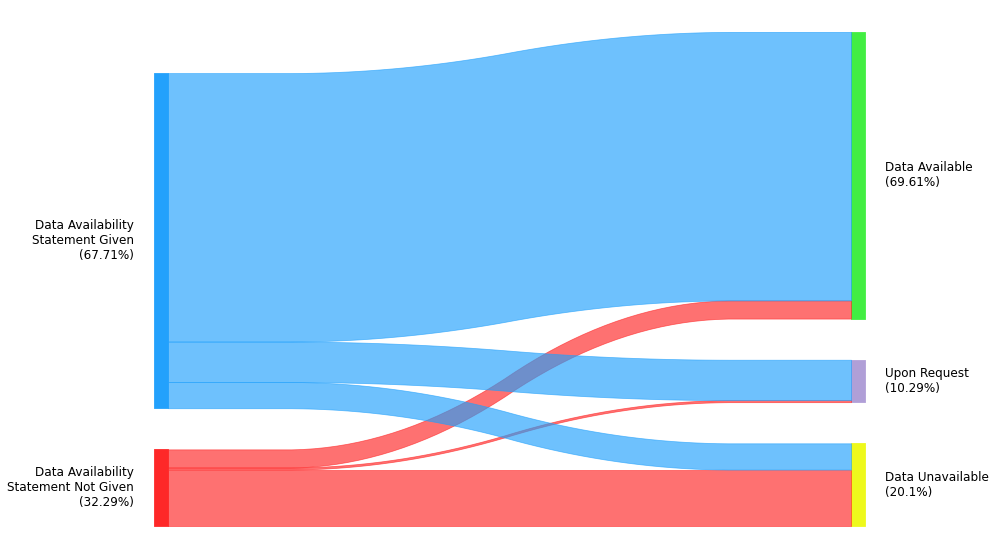

In [11]:
plt.figure(figsize=(14, 10))
plt.rcParams.update({'font.size': 12})
rcParams['font.family'] = 'sans-serif'
category_labels = [
    'Data Availability\nStatement Not Given\n(' + str(df_data_avail_statement['Percentage'][1]) +'%)',
    'Data Availability\nStatement Given\n(' + str(df_data_avail_statement['Percentage'][0]) + '%)',
    'Data Unavailable\n(' + str(df_data_avail['Percentage'][1]) + '%)',
    'Data Available\n(' + str(df_data_avail['Percentage'][0]) + '%)',
    'Upon Request\n(' + str(df_data_avail['Percentage'][2]) + '%)'
]

colors = ["#fe2626","#21a0fc","#eef91a","#40ee40","#b09ed7"]
color_dict = {}
for i, label in enumerate(category_labels):
    color_dict[label] = colors[i]

sankey(
    left=df_temp['Data availability statement (yes/no)'], right=df_temp['Data availability (yes/no)'],  aspect=20,  rightWeight=df_temp['Counts'].values.astype(float), leftWeight=df_temp['Counts'].values.astype(float),
    fontsize=12,colorDict=color_dict
)
plt.savefig('../Figures/sup2.png', format='png', dpi=300)


## Supplementary Figure 3

In [12]:
#create dataframe for counts data of code availability 
df_temp=pd.DataFrame({'Counts': df.groupby(['Data availability statement (yes/no)','Code availability statement (Yes/No)','Secondary analysis']).size()}).reset_index()
#filter df_temp to only have primary studies 
df_temp=df_temp[~(df_temp['Secondary analysis']=='yes')]

df_temp.loc[5,'Counts'] += df_temp.loc[4,'Counts']
df_temp.loc[8,'Counts'] += df_temp.loc[7,'Counts']
df_temp = df_temp.drop(4)
df_temp = df_temp.drop(7)
#create percentage column
df_temp['Percentage'] = (df_temp['Counts']/df_temp['Counts'].sum()) * 100
df_temp['Percentage']=df_temp['Percentage'].round(2)
df_temp


,Data availability statement (yes/no),Code availability statement (Yes/No),Secondary analysis,Counts,Percentage
0,no,no,no,36,17.65
2,no,yes,no,2,0.98
5,yes,no,no,91,44.61
8,yes,yes,no,75,36.76


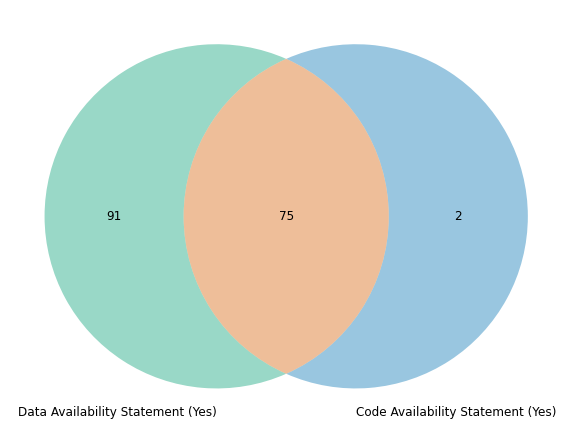

In [13]:
# Use the venn2 function
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 12})
rcParams['font.family'] = 'sans-serif'
colors = ['#009E73', '#0072B2','#D55E00']
venn=venn2_unweighted(subsets = (df_temp['Counts'][5], df_temp['Counts'][2], df_temp['Counts'][8]), set_labels = ('Data Availability Statement (Yes)', 'Code Availability Statement (Yes)'))
venn.get_patch_by_id('10').set_facecolor(colors[0])
venn.get_patch_by_id('01').set_facecolor(colors[1])
venn.get_patch_by_id('11').set_facecolor(colors[2])
for text in venn.set_labels:
    text.set_fontsize(12)
for x in range(len(venn.subset_labels)):
    if venn.subset_labels[x] is not None:
        venn.subset_labels[x].set_fontsize(12)

plt.savefig('../Figures/sup3.png', format='png', dpi=300)
plt.show()

## Supplementary Figure 4

In [14]:
df_temp=pd.DataFrame({'Counts': df.groupby(['Secondary analysis','Data availability (yes/no)']).size()}).reset_index()
df_temp.loc[df_temp['Secondary analysis'] == 'hybrid', 'Secondary analysis'] = 'Hybrid'
df_temp['Analysis']='Unknown'
df_temp.loc[df_temp['Secondary analysis'] == 'yes', 'Analysis'] = 'Secondary Analysis'
df_temp.loc[df_temp['Secondary analysis'] == 'Hybrid', 'Analysis'] = 'Both'
df_temp.loc[df_temp['Secondary analysis'] == 'no', 'Analysis'] = 'Primary Analysis'
#df_temp.loc[df_temp['Secondary analysis'] == 'Hybrid', 'Secondary analysis'] = 'yes'
df_temp = df_temp.drop('Secondary analysis', axis=1)

df_temp.loc[df_temp['Data availability (yes/no)'] == 'no', 'Data availability (yes/no)'] = 'No'
df_temp.loc[df_temp['Data availability (yes/no)'] == 'upon request', 'Data availability (yes/no)'] = 'Upon Request'
df_temp.loc[df_temp['Data availability (yes/no)'] == 'yes', 'Data availability (yes/no)'] = 'Yes'


#dealing with both value for Analysis column
df_temp.loc[2,'Counts'] += df_temp.loc[0,'Counts']
df_temp.loc[4,'Counts'] += df_temp.loc[1,'Counts']
df_temp = df_temp.drop(0)
df_temp = df_temp.drop(1)


df_temp['Percentage'] = (df_temp['Counts']/df_temp['Counts'].sum()) * 100
df_temp['Percentage']=df_temp['Percentage'].round(2)

df_temp=df_temp.reset_index()
df_temp=df_temp.drop('index', axis=1)

df_temp=df_temp.sort_values('Percentage', ascending=True)

df_temp

,Data availability (yes/no),Counts,Analysis,Percentage
1,Upon Request,21,Primary Analysis,10.29
0,No,41,Primary Analysis,20.10
2,Yes,142,Primary Analysis,69.61


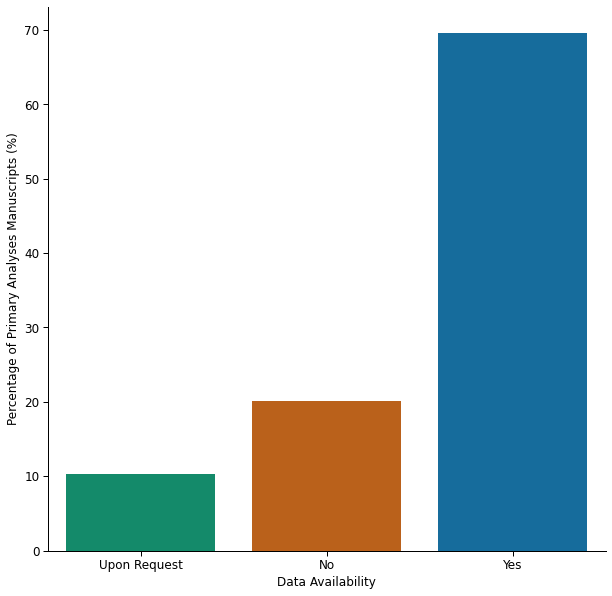

In [15]:
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 12})
rcParams['font.family'] = 'sans-serif'
sns.set_context("paper",font_scale=1)
color=['#009E73','#D55E00','#0072B2']
sns.barplot(data=df_temp, x='Data availability (yes/no)',y='Percentage', ci=None,palette=color)
plt.xlabel("Data Availability",fontsize=12)
plt.ylabel("Percentage of Primary Analyses Manuscripts (%)",fontsize=12)
plt.tick_params(axis='both', labelsize=12)
sns.despine()
plt.savefig('../Figures/sup4.png', format='png', dpi=300)
plt.show()

## Supplementary Figure 5

In [10]:
#replace upon request with no in the Data availability column of the data
df_modified = df.copy()
df_modified.loc[df_modified['Data availability (yes/no)'] == 'upon request', 'Data availability (yes/no)'] = 'no'
df_modified.loc[df_modified['Secondary analysis'] == 'Hybrid', 'Secondary analysis'] = 'no'
#create dataframe for counts data of code availability 
df_temp=pd.DataFrame({'Counts': df_modified.groupby(['Data availability (yes/no)','PMC_Year','Secondary analysis']).size()}).reset_index()

#filter df_temp to only have rows where data and code are available, only data shared, and only code shared 
df_temp=df_temp[~((df_temp['Data availability (yes/no)']=='no'))]
#filter df_temp to only have primary studies 
#df_temp=df_temp[~(df_temp['Secondary analysis']=='yes')]
#create percentage column
df_temp['Percent Increase'] = (df_temp['Counts']/204) * 100
df_temp['Cumulative Percent Increase']=df_temp['Percent Increase'].cumsum()
df_temp['Cumulative Percent Increase']=df_temp['Cumulative Percent Increase'].round(2)

df_temp=df_temp.reset_index()
df_temp=df_temp.drop('index', axis=1)
df_temp

,Data availability (yes/no),PMC_Year,Secondary analysis,Counts,Percent Increase,Cumulative Percent Increase
0,yes,2016,no,19,9.313725,9.31
1,yes,2017,no,26,12.745098,22.06
2,yes,2018,no,21,10.294118,32.35
3,yes,2019,no,25,12.254902,44.61
4,yes,2020,no,21,10.294118,54.90
5,yes,2021,no,30,14.705882,69.61


In [11]:
df_temp['Counts'].sum()

142

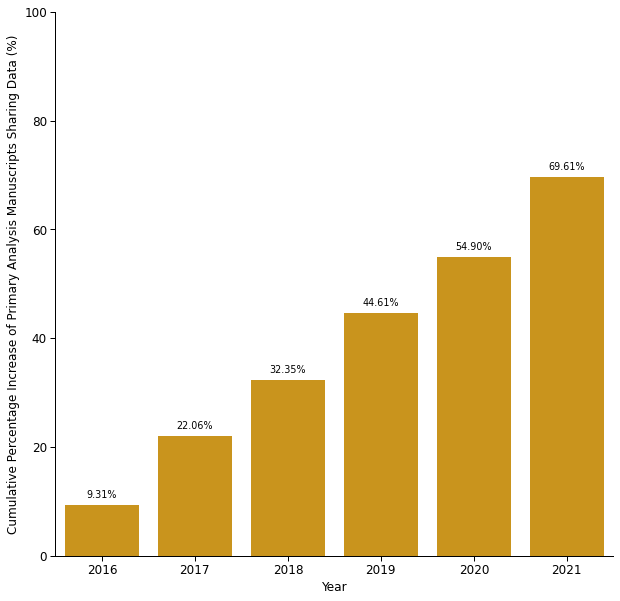

In [17]:
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 12})
rcParams['font.family'] = 'sans-serif'
sns.set_context("paper",font_scale=1)
colors = ['#E69F00']
sns.barplot(data=df_temp, x='PMC_Year', y='Cumulative Percent Increase',palette=colors )

for index, row in df_temp.iterrows():
    plt.annotate(f'{row["Cumulative Percent Increase"]:.2f}%', xy=(index, row['Cumulative Percent Increase']),
                 xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
sns.despine()
plt.xlabel("Year",fontsize=12)
plt.ylabel("Cumulative Percentage Increase of Primary Analysis Manuscripts Sharing Data (%)",fontsize=12)
plt.ylim([0, 100])
plt.tick_params(axis='both', labelsize=12)
sns.despine()
plt.savefig('../Figures/sup5.png', format='png', dpi=300)
plt.show()

## Supplementary Figure 6

just removed no and uncertain from the cell value
column headers are
"If yes, notebook/Rmd"	"If yes, single/ multiple"
you just have to make figure on this column "If yes, notebook/Rmd"
also "yes" means Rmd

In [139]:
df_modified = df.copy()
df_modified.loc[df_modified['If yes, notebook/Rmd'] == 'no ', 'If yes, notebook/Rmd'] = 'no'
df_modified.loc[df_modified['If yes, notebook/Rmd'] == 'uncertain', 'If yes, notebook/Rmd'] = 'no'
df_modified.loc[df_modified['If yes, notebook/Rmd'] == 'yes', 'If yes, notebook/Rmd'] = 'Rmd'
df_modified.loc[df_modified['If yes, notebook/Rmd'] == 'notebook', 'If yes, notebook/Rmd'] = 'Notebook'
df_modified=df_modified.fillna('no')
df_temp=pd.DataFrame({'Counts': df_modified['If yes, notebook/Rmd'].value_counts()}).reset_index()
df_temp=df_temp.rename(columns={"index":"Format"})
#add percentage column 
df_temp['Percentage'] = (df_temp['Counts']/df_temp['Counts'].sum()) * 100
df_temp['Percentage']=df_temp['Percentage'].round(2)
#df_temp=df_temp[~((df_temp['Format']=='no'))]
df_temp

,Format,Counts,Percentage
0,no,418,92.27
1,Rmd,23,5.08
2,Notebook,12,2.65


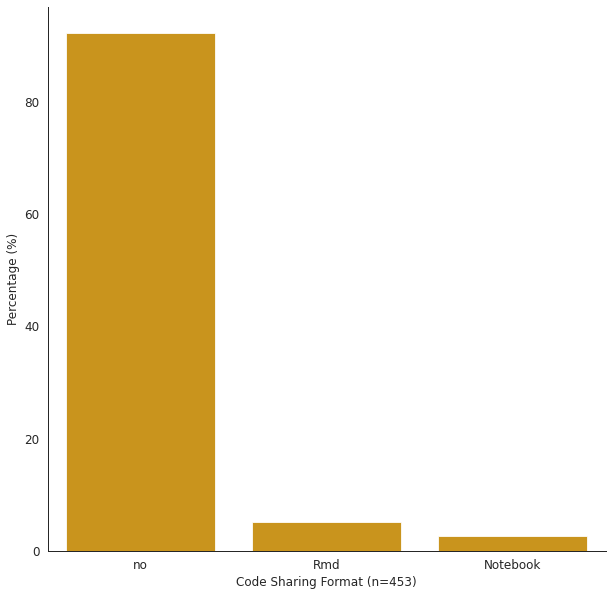

In [140]:
plt.figure(figsize=(10, 10))
sns.set_style("white")
sns.set_context("paper",font_scale=1)
rcParams['font.family'] = 'sans-serif'
plt.rcParams.update({'font.size': 12})
colors = ['#E69F00']
sns.barplot(data=df_temp, x='Format',y='Percentage', palette=colors)
plt.xlabel("Code Sharing Format (n=453)",fontsize=12)
plt.ylabel("Percentage (%)",fontsize=12)
plt.tick_params(axis='both', labelsize=12)
sns.despine()
plt.savefig('../Figures/sup6.png', format='png', dpi=300)
plt.show()

## Supplementary Figure 7

Can we make a supl figure
where we compare the code availability across type of journals 
like Mandatory and encouraged
and the same for data

In [52]:
df_journal=pd.read_csv("../data/journal_data.csv")
df_journal

,Journal,Code Policy,Data Policy
0,Bioinformatics,Mandatory,Mandatory
1,BMC Bioinformatics,Encouraged,Encouraged
2,Genome Biology,Mandatory,Mandatory
3,Genome Medicine,Encouraged,Encouraged
4,Nature Biotechnology,Mandatory,Mandatory
5,Nature Genetics,Mandatory,Mandatory
6,Nature Methods,Mandatory,Mandatory
7,Nucleic Acids Research,Encouraged,Mandatory


In [166]:
df_modified = df.copy()
df_modified['Code Policy']='Unknown'
df_modified['Data Policy']='Unknown'
df_modified.loc[(df_modified['Journal'] == 'Nat_Genet'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Genetics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Genet'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Genetics', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Genome_Med'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Medicine', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Genome_Med'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Medicine', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Genome_Biol'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Biology', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Genome_Biol'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Biology', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Nat_Biotechnol'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Biotechnology', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Biotechnol'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Biotechnology', 'Data Policy'].item()


df_modified.loc[(df_modified['Journal'] == 'Nat_Methods'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Methods', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Methods'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Methods', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Nucleic_Acids_Res'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nucleic Acids Research', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nucleic_Acids_Res'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nucleic Acids Research', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'BMC_Bioinformatics'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'BMC Bioinformatics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'BMC_Bioinformatics'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'BMC Bioinformatics', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Bioinformatics'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Bioinformatics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Bioinformatics'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Bioinformatics', 'Data Policy'].item()
df_modified.loc[df_modified['Secondary analysis'] == 'Hybrid', 'Secondary analysis'] = 'no'

In [174]:
df_temp=pd.DataFrame({'Counts': df_modified.groupby(['Secondary analysis','Code availability (Yes/No)','Code Policy']).size()}).reset_index()
df_temp=df_temp[~(df_temp['Secondary analysis']=='yes')]
#add percentage column 
df_temp['Percentage'] = (df_temp['Counts']/df_temp['Counts'].sum()) * 100
df_temp['Percentage']=df_temp['Percentage'].round(2)
df_temp=df_temp.sort_values('Percentage', ascending=True)
df_temp

,Secondary analysis,Code availability (Yes/No),Code Policy,Counts,Percentage
2,no,yes,Encouraged,14,6.86
0,no,no,Encouraged,53,25.98
3,no,yes,Mandatory,60,29.41
1,no,no,Mandatory,77,37.75


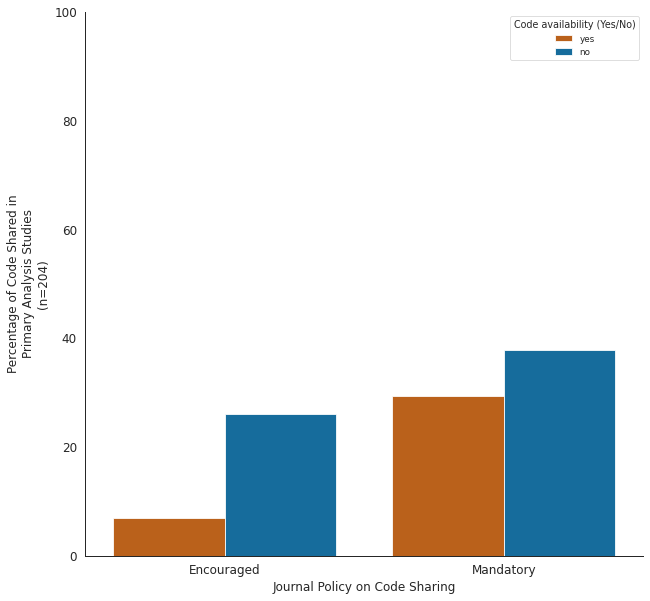

In [178]:
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 12})
rcParams['font.family'] = 'sans-serif'
sns.set_context("paper",font_scale=1)
color=['#D55E00','#0072B2']
sns.barplot(data=df_temp, x='Code Policy', y='Percentage',hue='Code availability (Yes/No)', ci=None,palette=color)
sns.despine()
plt.ylabel("Percentage of Code Shared in\nPrimary Analysis Studies\n(n=204)",fontsize=12)
plt.ylim(0,100)
plt.xlabel("Journal Policy on Code Sharing",fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.savefig('../Figures/sup7.png', format='png', dpi=300)
plt.show()

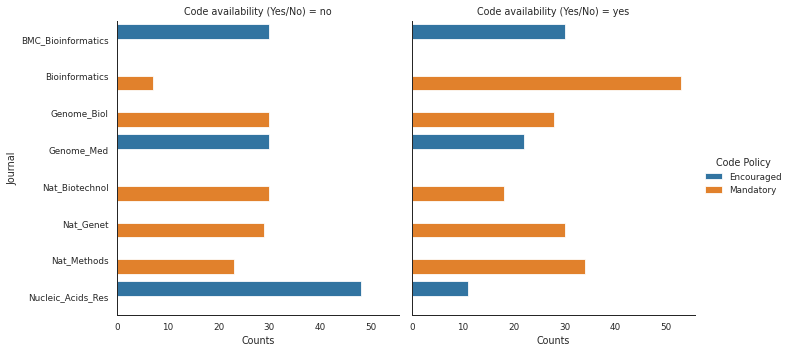

In [106]:
sns.catplot(
    data=df_temp, y="Journal", x="Counts", col="Code availability (Yes/No)",
    kind="bar", hue="Code Policy"
)

## Supplementary Figure 8

In [139]:
df_journal=pd.read_csv("../data/journal_data.csv")
df_journal

,Journal,Code Policy,Data Policy
0,Bioinformatics,Mandatory,Mandatory
1,BMC Bioinformatics,Encouraged,Encouraged
2,Genome Biology,Mandatory,Mandatory
3,Genome Medicine,Encouraged,Encouraged
4,Nature Biotechnology,Mandatory,Mandatory
5,Nature Genetics,Mandatory,Mandatory
6,Nature Methods,Mandatory,Mandatory
7,Nucleic Acids Research,Encouraged,Mandatory


In [179]:
df_modified = df.copy()
df_modified['Code Policy']='Unknown'
df_modified['Data Policy']='Unknown'
df_modified.loc[(df_modified['Journal'] == 'Nat_Genet'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Genetics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Genet'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Genetics', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Genome_Med'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Medicine', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Genome_Med'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Medicine', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Genome_Biol'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Biology', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Genome_Biol'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Genome Biology', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Nat_Biotechnol'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Biotechnology', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Biotechnol'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Biotechnology', 'Data Policy'].item()


df_modified.loc[(df_modified['Journal'] == 'Nat_Methods'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Methods', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nat_Methods'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nature Methods', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Nucleic_Acids_Res'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Nucleic Acids Research', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Nucleic_Acids_Res'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Nucleic Acids Research', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'BMC_Bioinformatics'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'BMC Bioinformatics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'BMC_Bioinformatics'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'BMC Bioinformatics', 'Data Policy'].item()

df_modified.loc[(df_modified['Journal'] == 'Bioinformatics'), 'Code Policy'] = df_journal.loc[df_journal['Journal'] == 'Bioinformatics', 'Code Policy'].item()
df_modified.loc[(df_modified['Journal'] == 'Bioinformatics'), 'Data Policy'] = df_journal.loc[df_journal['Journal'] == 'Bioinformatics', 'Data Policy'].item()


df_modified.loc[df_modified['Data availability (yes/no)'] == 'upon request', 'Data availability (yes/no)'] = 'no'
df_modified.loc[df_modified['Secondary analysis'] == 'Hybrid', 'Secondary analysis'] = 'no'


In [182]:
df_temp=pd.DataFrame({'Counts': df_modified.groupby(['Secondary analysis','Data availability (yes/no)','Data Policy']).size()}).reset_index()
df_temp=df_temp[~(df_temp['Secondary analysis']=='yes')]
#add percentage column 
df_temp['Percentage'] = (df_temp['Counts']/df_temp['Counts'].sum()) * 100
df_temp['Percentage']=df_temp['Percentage'].round(2)
df_temp=df_temp.sort_values('Percentage', ascending=True)
df_temp

,Secondary analysis,Data availability (yes/no),Data Policy,Counts,Percentage
0,no,no,Encouraged,12,5.88
2,no,yes,Encouraged,18,8.82
1,no,no,Mandatory,50,24.51
3,no,yes,Mandatory,124,60.78


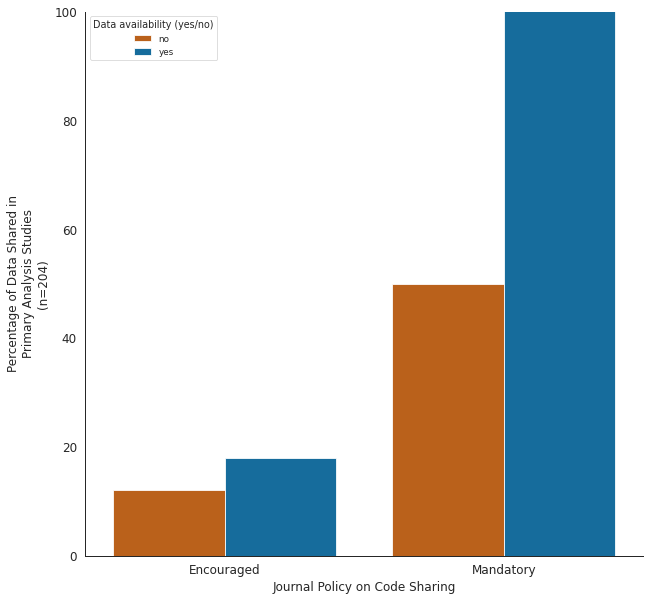

In [183]:
plt.figure(figsize=(10, 10))
plt.rcParams.update({'font.size': 12})
rcParams['font.family'] = 'sans-serif'
sns.set_context("paper",font_scale=1)
color=['#D55E00','#0072B2']
sns.barplot(data=df_temp, x='Data Policy', y='Counts',hue='Data availability (yes/no)',ci=None,palette=color)
#, palette=colors)

#for index, row in df_temp.iterrows():
#    plt.annotate(f'{row["Cumulative Percent Increase"]:.2f}%', xy=(index, row['Cumulative Percent Increase']),
#                 xytext=(0, 5), textcoords='offset points', ha='center', va='bottom')
sns.despine()
plt.ylabel("Percentage of Data Shared in\nPrimary Analysis Studies\n(n=204)",fontsize=12)
plt.ylim(0,100)
plt.xlabel("Journal Policy on Code Sharing",fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.savefig('../Figures/sup8.png', format='png', dpi=300)
plt.show()

## Supplementary Table 1

In [162]:
#replace upon request with no in the Data availability column of the data
df_modified = df.copy()
#create dataframe of counts
df_temp=pd.DataFrame({'Counts': df_modified['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'].value_counts()}).reset_index()
#rename columns
df_temp=df_temp.rename(columns={"index":"Source"})
#adding Github,Zenodo to Github and Zenodo Counts 
df_temp.loc[df_temp['Source']=='GitHub','Counts'] += int(df_temp.loc[df_temp['Source']=='GitHub, Zenodo','Counts'])
df_temp.loc[df_temp['Source']=='Zenodo','Counts'] += int(df_temp.loc[df_temp['Source']=='GitHub, Zenodo','Counts'])
df_temp = df_temp.drop(df_temp.loc[df_temp['Source']=='GitHub, Zenodo'].index[0])

#adding Github,Supplementary to Github and Supplementary Counts
df_temp.loc[df_temp['Source']=='GitHub','Counts'] += int(df_temp.loc[df_temp['Source']=='GitHub, Supplementary','Counts'])
df_temp.loc[df_temp['Source']=='Supplementary','Counts'] += int(df_temp.loc[df_temp['Source']=='GitHub, Supplementary','Counts'])
df_temp = df_temp.drop(df_temp.loc[df_temp['Source']=='GitHub, Supplementary'].index[0])

#adding Website,Github to Github and Website Counts
df_temp.loc[df_temp['Source']=='GitHub','Counts'] += int(df_temp.loc[df_temp['Source']=='Website, Github','Counts'])
df_temp.loc[df_temp['Source']=='Website','Counts'] += int(df_temp.loc[df_temp['Source']=='Website, Github','Counts'])
df_temp = df_temp.drop(df_temp.loc[df_temp['Source']=='Website, Github'].index[0])

#drop NA row
df_temp = df_temp.drop(df_temp.loc[df_temp['Source']=='NA'].index[0])


#add percentage column 
df_temp['Percentage'] = (df_temp['Counts']/df_temp['Counts'].sum()) * 100
df_temp['Percentage']=df_temp['Percentage'].round(2)

#sort data by percentage
df_temp=df_temp.sort_values('Percentage', ascending=True)

df_temp=df_temp.reset_index()
df_temp=df_temp.drop('index', axis=1)
df_temp

,Source,Counts,Percentage
0,10xGenomics,1,0.43
1,Downloadable File,2,0.85
2,GitLab,2,0.85
3,CRAN,2,0.85
4,Bioconductor,2,0.85
5,Sourceforge,3,1.28
6,Bitbucket,6,2.56
7,Supplementary,6,2.56
8,Zenodo,14,5.98
9,Website,16,6.84


### Figure for Supplementary Table 1 

In [ ]:
#replace upon request with no in the Data availability column of the data
df_modified = df.copy()
df_modified.loc[df_modified['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'Downloadable File', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Other'
df_modified.loc[df_modified['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'GitLab', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Other'
df_modified.loc[df_modified['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'CRAN', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Other'
df_modified.loc[df_modified['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == 'Bioconductor', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Other'
df_modified.loc[df_modified['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] == '10xGenomics', 'If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'] = 'Other'

#create dataframe of counts
df_temp=pd.DataFrame({'Counts': df_modified['If Code availability = yes, where do they share code (supplementary/ GitHub/ other)'].value_counts()}).reset_index()
#rename columns
df_temp=df_temp.rename(columns={"index":"Source"})
#adding Github,Zenodo to Github and Zenodo Counts 
df_temp.loc[df_temp['Source']=='GitHub','Counts'] += int(df_temp.loc[df_temp['Source']=='GitHub, Zenodo','Counts'])
df_temp.loc[df_temp['Source']=='Zenodo','Counts'] += int(df_temp.loc[df_temp['Source']=='GitHub, Zenodo','Counts'])
df_temp = df_temp.drop(df_temp.loc[df_temp['Source']=='GitHub, Zenodo'].index[0])

#adding Github,Supplementary to Github and Supplementary Counts
df_temp.loc[df_temp['Source']=='GitHub','Counts'] += int(df_temp.loc[df_temp['Source']=='GitHub, Supplementary','Counts'])
df_temp.loc[df_temp['Source']=='Supplementary','Counts'] += int(df_temp.loc[df_temp['Source']=='GitHub, Supplementary','Counts'])
df_temp = df_temp.drop(df_temp.loc[df_temp['Source']=='GitHub, Supplementary'].index[0])

#adding Website,Github to Github and Website Counts
df_temp.loc[df_temp['Source']=='GitHub','Counts'] += int(df_temp.loc[df_temp['Source']=='Website, Github','Counts'])
df_temp.loc[df_temp['Source']=='Website','Counts'] += int(df_temp.loc[df_temp['Source']=='Website, Github','Counts'])
df_temp = df_temp.drop(df_temp.loc[df_temp['Source']=='Website, Github'].index[0])

#drop NA row
df_temp = df_temp.drop(df_temp.loc[df_temp['Source']=='NA'].index[0])


#add percentage column 
df_temp['Percentage'] = (df_temp['Counts']/df_temp['Counts'].sum()) * 100
df_temp['Percentage']=df_temp['Percentage'].round(2)

#sort data by percentage
df_temp=df_temp.sort_values('Percentage', ascending=True)

df_temp=df_temp.reset_index()
df_temp=df_temp.drop('index', axis=1)
df_temp

In [ ]:
sns.set_style("white")
sns.set_context("paper",font_scale=1)
#sns.set_palette("pastel")
rcParams['font.family'] = 'sans-serif'
colors = ["#E69F00"]
sns.barplot(data=df_temp, x='Percentage',y='Source', palette=colors)
plt.xlim(0,100)
for index, row in df_temp.iterrows():
    plt.annotate(f'{row["Percentage"]}%', xy=(row['Percentage'],index),ha='left', va='center')
sns.despine()
plt.show()


## Supplementary Table 2

In [103]:
df_journal=pd.read_csv("../data/journal_data.csv")
df_journal

,Journal,Code Policy,Data Policy
0,Bioinformatics,Mandatory,Mandatory
1,BMC Bioinformatics,Encouraged,Encouraged
2,Genome Biology,Mandatory,Mandatory
3,Genome Medicine,Encouraged,Encouraged
4,Nature Biotechnology,Mandatory,Mandatory
5,Nature Genetics,Mandatory,Mandatory
6,Nature Methods,Mandatory,Mandatory
7,Nucleic Acids Research,Encouraged,Mandatory
